In [1]:
import pandas as pd
import numpy as np


#### Timestamp
Timestamp is interchangeable with Pandas DateTime in most of the time

In [2]:
pd.Timestamp('9 Jun 2017 10:30AM')

Timestamp('2017-06-09 10:30:00')

#### Period
Period is a time span


In [3]:
pd.Period('Jan 2017')

Period('2017-01', 'M')

In [4]:
pd.Period('22 Nov 1978')

Period('1978-11-22', 'D')

#### DatetimeIndex
this is an index of Timestamp

### Series indices
just a quick reminder, when you instantiate a Pandas Series, the second argument is an index, unless you name your arguments. 

In [39]:
s = pd.Series(index=list('abc'),data=[1,2,3])
s

a    1
b    2
c    3
dtype: int64

In [35]:
s = pd.Series([1,2,3],list('abc'))
s

a    1
b    2
c    3
dtype: int64

#### Timestamp conversion to DatetimeIndex


In [5]:
t1 = pd.Series(list('abc'),[pd.Timestamp('01 Sep 2016'),pd.Timestamp('03 Sep 2016'),pd.Timestamp('03 Sep 2016')])
t1

2016-09-01    a
2016-09-03    b
2016-09-03    c
dtype: object

In [6]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [40]:
# same for Periods, they get converted to PeriodIndex
t2 = pd.Series(list('def'), [pd.Period('Sep 2016'),pd.Period('Oct 2016'),pd.Period('Nov 2016')])
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Create a DataFrame with DateTime

at the beginning the output has a messy index.. you need to tell Pandas that this is a series of datetime values 

In [8]:
d1=['2 Jun 2013','Aug 14, 2016','2015-06-23','7 Dec 16']
ts3=pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1,columns=list('ab'))
ts3

,a,b
2 Jun 2013,36,74
"Aug 14, 2016",58,27
2015-06-23,91,24
7 Dec 16,14,35


#### Pandas has the to_datetime function to do that:

In [9]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,36,74
2016-08-14,58,27
2015-06-23,91,24
2016-12-07,14,35


#### to_datetime has options to change the format of the date
for example you can pass european datetime format or american datetime format

In [24]:
pd.to_datetime('4.1.2017',dayfirst=True)

Timestamp('2017-01-04 00:00:00')

In [26]:
pd.to_datetime('4.1.2017')

Timestamp('2017-04-01 00:00:00')

In [48]:
pd.Series(pd.to_datetime('2017/08/09')).dt.strftime("%Y-%m-%d")

0    2017-08-09
dtype: object

### Time deltas

In [10]:
pd.Timestamp('9 Sep 2016')-pd.Timestamp('18 Sep 2016')

Timedelta('-9 days +00:00:00')

In [11]:
# add a Timedelta to a Timestamp and you end up with a new Timestampm
pd.Timestamp('10 Nov 2016')+pd.Timedelta('12D 3H')

Timestamp('2016-11-22 03:00:00')

#### working with Dates in a Dataframe

suppose we want to look at 9 data points taken biweekly, on Sundays, starting on a certain date (1st of Oct 2016 in the example below)
Notice the format to specify the date: '2W-SUN'

In [54]:
# notice that the starting date is not a sunday, so it'll skip and start with the first Sunday after that
dates = pd.date_range('30 Sep 2016', periods=9, freq = '2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [13]:
df = pd.DataFrame({'Count1':100 + np.random.randint(-5,10,9).cumsum(),
                  'Count2':120 + np.random.randint(-5,10,9)},index=dates)
df

,Count1,Count2
2016-10-02,98,124
2016-10-16,94,125
2016-10-30,94,125
2016-11-13,100,121
2016-11-27,106,118
2016-12-11,109,126
2016-12-25,104,123
2017-01-08,101,117
2017-01-22,106,121


#### We can check what day of the week the data is on: 
for example, we can verify that all the dates are on sunday:

In [14]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [15]:
df.diff()

,Count1,Count2
2016-10-02,NaN,NaN
2016-10-16,-4.0,1.0
2016-10-30,0.0,0.0
2016-11-13,6.0,-4.0
2016-11-27,6.0,-3.0
2016-12-11,3.0,8.0
2016-12-25,-5.0,-3.0
2017-01-08,-3.0,-6.0
2017-01-22,5.0,4.0


for additional offset aliases see: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases


In [72]:
# some other utilities available
# resample using average (mean), and returns monthly data instead of fortnightly
# 
m = df.resample('M').mean()
s = df.resample('A').sum() # A is yearly
print(s)
print(m)

            Count1  Count2
2016-12-31     705     862
2017-12-31     207     238
                Count1      Count2
2016-10-31   95.333333  124.666667
2016-11-30  103.000000  119.500000
2016-12-31  106.500000  124.500000
2017-01-31  103.500000  119.000000


In [17]:
df['2017'] # everything in 2017

,Count1,Count2
2017-01-08,101,117
2017-01-22,106,121


In [18]:
df['2016-12'] # everything in Dec 2016

,Count1,Count2
2016-12-11,109,126
2016-12-25,104,123


In [73]:
df['2016-12':] # everything starting Dec 2016

,Count1,Count2
2016-12-11,109,126
2016-12-25,104,123
2017-01-08,101,117
2017-01-22,106,121


In [20]:
# similar to resample, but increase the frequency: 
df.asfreq('W',method='ffill')

,Count1,Count2
2016-10-02,98,124
2016-10-09,98,124
2016-10-16,94,125
2016-10-23,94,125
2016-10-30,94,125
2016-11-06,94,125
2016-11-13,100,121
2016-11-20,100,121
2016-11-27,106,118
2016-12-04,106,118


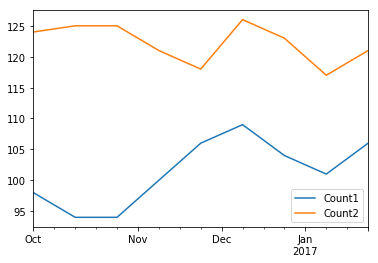

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()